# <b>How to - Deep Learning</b> 

Autor: <b>Thiago Vilarinho Lemes</b> <br>
Data: 12/11/2022 <br>
e-mail: contatothiagolemes@gmail.com  <br>
LinkedIn: https://www.linkedin.com/in/thiago-vilarinho-lemes-b1232727/

<b>Descrição</b>: Este <i>How to</i> tem como objetivo ter uma referência para classificar e medir a acurácia de imagens utilizando a biblioteca <i>KERAS</i> com <i>MLPClassifier</i> com figuras de tons de cinza da mesma.

<b>Ref.: </b>https://keras.io/api/datasets/fashion_mnist/

In [1]:
# Montando o Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando bibliotecas

In [ ]:
from keras.utils import to_categorical # Biblioteca para transformar variáveis em variáveis categoricas.
from sklearn.neural_network import MLPClassifier # Algoritmo de Rede Neural.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importando o dataset

In [ ]:
# Importando o dataset do keras.
# Logo em seguida é criado os dataset´s X_train, y_train, X_test, y_test.
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Verificando o dataset

In [ ]:
print(f'Treinamento X_train: {X_train.shape} | Teste: y_train: {y_train.shape}')
print(f'Treinamento X_test:  {X_test.shape} | Teste: y_test:  {y_test.shape}')

Treinamento X_train: (60000, 28, 28) | Teste: y_train: (60000,)
Treinamento X_test:  (10000, 28, 28) | Teste: y_test:  (10000,)


In [ ]:
# Verificando os tipos de X_train, y_train.
print('Dataset types:', X_train.dtype, y_train.dtype)

Dataset types: uint8 uint8


## Plotando uma imagem

Classe da imagem: 9



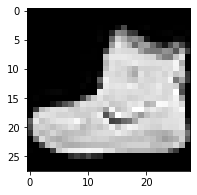

In [ ]:
# Plotando uma imagem a partir da feature.
%matplotlib inline

# Expecifica o tamanho da imagem.
plt.rcParams['figure.figsize'] = 3, 3

print(f'Classe da imagem: {y_train[0]}')
print()
plt.imshow(X_train[0, :, :], cmap='gray');

In [ ]:
# Verificando o valor mínimo e máximo para X_train e as classes da target.
print('Range de Pixel: (%d, %d)' % (X_train.min(), X_train.max()))
print('Classes:', np.unique(y_train))

Range de Pixel: (0, 255)
Classes: [0 1 2 3 4 5 6 7 8 9]


## Preparando os dados

## Transformando as imagens em um vetor

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


## Convertendo as entradas para float32 e colocando no range (0, 1) para simplificar o treinamento

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


## Transformando a target em categorica


In [ ]:
# Selecionando o número de classes
num_classes = len(np.unique(y_train))

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Treinando a Rede Neural

In [ ]:
# hidden_layer_sizes - Número de Neurônios da Camada Escondida.
# batch_size - Tamanho de mini-batch para otimizadores estocásticos.  Se o solver for 'lbfgs', o classificador não usará o mini-batch.  Quando definido como “automático”.
#   - Estocástico: atualiza os pesos depois de um exemplo;
#   - Mini-batch: atualiza os pesos depois de ver um batch de exemplos;
#   - Gradiente descendente: atualiza os pesos depois de ver o treinamento inteiro.
# learning_rate_init - Taxa de aprendizado para atualizações de peso. 
# verbose - As mensagens de progresso são impressas.
# alpha - Força do prazo de regularização L2. O prazo de regularização L2 é dividido pelo tamanho da amostra quando adicionado à perda.
model = MLPClassifier(
    hidden_layer_sizes=(), 
    batch_size=32, 
    learning_rate_init=0.0005, 
    verbose=True, 
    alpha=0.1, 
    random_state=42
)

model.fit(X_train, y_train)

Iteration 1, loss = 1.58853624
Iteration 2, loss = 1.19297392
Iteration 3, loss = 1.13676837
Iteration 4, loss = 1.11087175
Iteration 5, loss = 1.09373046
Iteration 6, loss = 1.08126685
Iteration 7, loss = 1.07162826
Iteration 8, loss = 1.06522108
Iteration 9, loss = 1.05991806
Iteration 10, loss = 1.05553832
Iteration 11, loss = 1.05046336
Iteration 12, loss = 1.04856286
Iteration 13, loss = 1.04557075
Iteration 14, loss = 1.04308554
Iteration 15, loss = 1.04088811
Iteration 16, loss = 1.04040851
Iteration 17, loss = 1.03863655
Iteration 18, loss = 1.03850514
Iteration 19, loss = 1.03711865
Iteration 20, loss = 1.03601966
Iteration 21, loss = 1.03496568
Iteration 22, loss = 1.03475713
Iteration 23, loss = 1.03507650
Iteration 24, loss = 1.03422410
Iteration 25, loss = 1.03381303
Iteration 26, loss = 1.03340912
Iteration 27, loss = 1.03305344
Iteration 28, loss = 1.03344771
Iteration 29, loss = 1.03234010
Iteration 30, loss = 1.03263463
Iteration 31, loss = 1.03266710
Iteration 32, los

MLPClassifier(alpha=0.1, batch_size=32, hidden_layer_sizes=(),
              learning_rate_init=0.0005, random_state=42, verbose=True)

## Plotando o gráfico

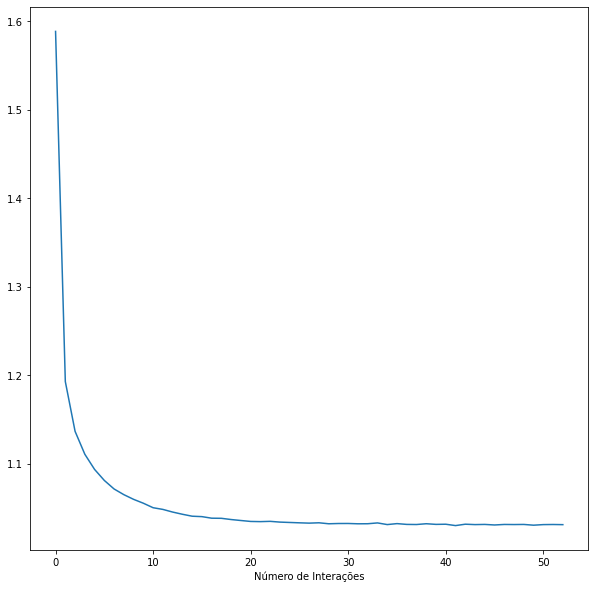

In [ ]:
# Expecificando o tamanho da imagem.
plt.rcParams['figure.figsize'] = 10, 10
plt.plot(list(range(len(model.loss_curve_))), model.loss_curve_)
plt.xlabel('Número de Interações');

## Medindo a Acurácia do modelo

In [ ]:
# Medindo a acurácia
print('Accuracy:', model.score(X_test, y_test)*100,'%')

Accuracy: 71.1 %
